# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import stats, linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [70]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 555


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [74]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | santa ana
Processing Record 8 of Set 1 | kayangel
Processing Record 9 of Set 1 | batarasa
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | camana
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | constantia
Processing Record 15 of Set 1 | nago
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | severo-vostotchnyi bank
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | igbara-odo
Processing Record 20 of Set 1 | george town
Processing Record 21 of Set 1 | benemerito de las americas
Processing Rec

In [75]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          533
Lat           533
Lng           533
Max Temp      533
Humidity      533
Cloudiness    533
Wind Speed    533
Country       533
Date          533
dtype: int64

In [76]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.88,98,100,9.41,TF,1738716904
1,hermanus,-34.4187,19.2345,19.51,77,66,3.56,ZA,1738716905
2,grytviken,-54.2811,-36.5092,3.31,86,53,9.59,GS,1738716906
3,chonchi,-42.6128,-73.8092,13.95,81,0,0.39,CL,1738716907
4,klyuchi,52.2667,79.1667,-9.02,98,98,2.91,RU,1738716908


In [77]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [78]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.88,98,100,9.41,TF,1738716904
1,hermanus,-34.4187,19.2345,19.51,77,66,3.56,ZA,1738716905
2,grytviken,-54.2811,-36.5092,3.31,86,53,9.59,GS,1738716906
3,chonchi,-42.6128,-73.8092,13.95,81,0,0.39,CL,1738716907
4,klyuchi,52.2667,79.1667,-9.02,98,98,2.91,RU,1738716908


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

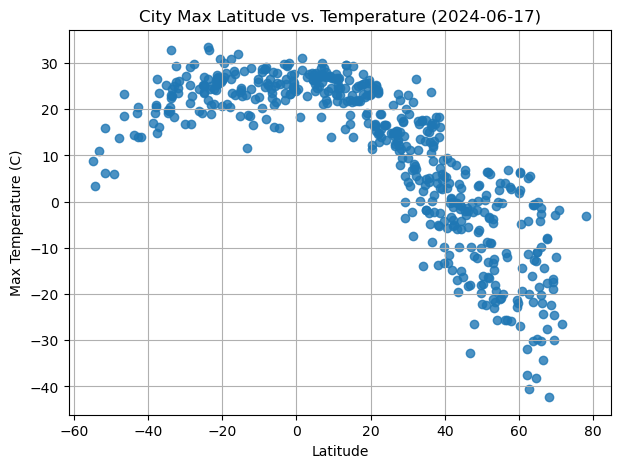

In [80]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(7,5))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

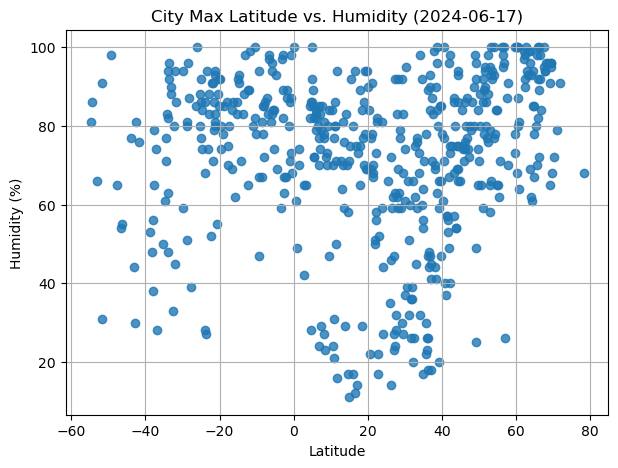

In [82]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(7,5))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

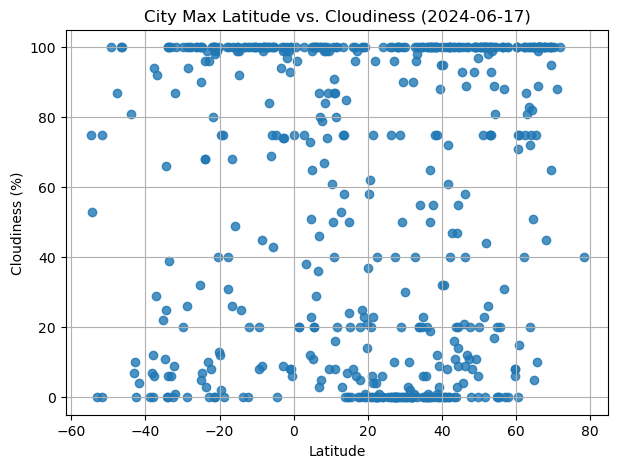

In [84]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(7,5))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

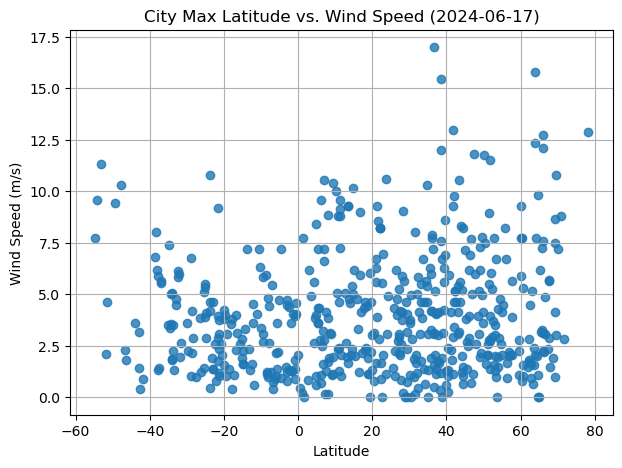

In [86]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(7,5))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots

#Latitude vs Temp
(temp_lat_slope, temp_lat_intercept, temp_lat_rvalue, temp_lat_pvalue, temp_lat_stderr) = stats.linregress(city_data_df["Lat"], city_data_df["Max Temp"])

#Latitude vs Humidity
(hum_lat_slope, hum_lat_inteZrcept, hum_lat_rvalue, hum_lat_pvalue, hum_lat_stderr) = stats.linregress(city_data_df["Lat"], city_data_df["Humidity"])

#Latitude vs Cloudiness
(cloud_lat_slope, cloud_lat_intercept, cloud_lat_rvalue, cloud_lat_pvalue, cloud_lat_stderr) = stats.linregress(city_data_df["Lat"], city_data_df["Cloudiness"])

#Latitude vs Wind Speed
(wind_lat_slope, wind_lat_intercept, wind_lat_rvalue, wind_lat_pvalue, wind_lat_stderr) = stats.linregress(city_data_df["Lat"], city_data_df["Wind Speed"])

regress_values = city_data_df["Lat"] * temp_lat_slope + temp_lat_intercept
print(regress_values)

City_ID
0      38.494539
1      32.409505
2      40.504138
3      35.748891
4      -2.917873
         ...    
528     7.048611
529     0.802804
530    12.541334
531    21.540166
532     2.877852
Name: Lat, Length: 533, dtype: float64


C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\3891417276.py:4: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (temp_lat_slope, temp_lat_intercept, temp_lat_rvalue, temp_lat_pvalue, temp_lat_stderr) = stats.linregress(city_data_df["Lat"], city_data_df["Max Temp"])
C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\3891417276.py:7: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (hum_lat_slope, hum_lat_inteZrcept, hum_lat_rvalue, hum_lat_pvalue, hum_lat_stderr) = stats.linregress(city_data_df["Lat"], city_data_df["Humidity"])
C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\3891417276.py:10: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.

In [111]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,klyuchi,52.2667,79.1667,-9.02,98,98,2.91,RU,1738716908
5,santa ana,33.7456,-117.8678,17.50,68,20,6.69,US,1738716909
6,kayangel,8.0823,134.7173,28.00,78,100,8.83,PW,1738716910
7,batarasa,8.6617,117.6222,27.23,72,99,3.11,PH,1738716911
8,bethel,41.3712,-73.4140,-0.24,57,8,1.79,US,1738716913


In [113]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.88,98,100,9.41,TF,1738716904
1,hermanus,-34.4187,19.2345,19.51,77,66,3.56,ZA,1738716905
2,grytviken,-54.2811,-36.5092,3.31,86,53,9.59,GS,1738716906
3,chonchi,-42.6128,-73.8092,13.95,81,0,0.39,CL,1738716907
9,camana,-16.6228,-72.7111,23.12,84,68,2.31,PE,1738716914


###  Temperature vs. Latitude Linear Regression Plot

C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\2016355008.py:5: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr) = stats.linregress(x_north, y_north)


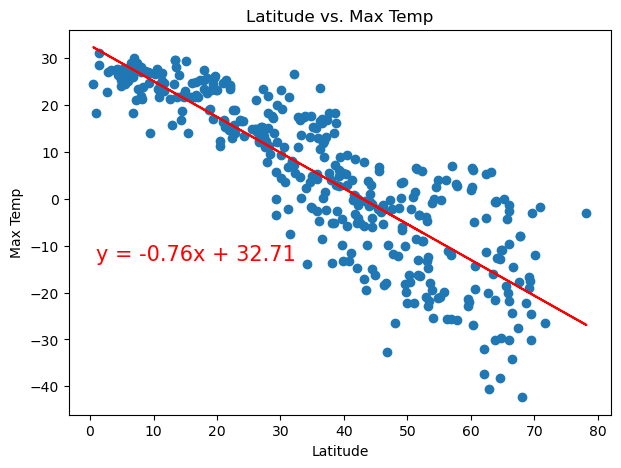

In [287]:
# Linear regression on Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Max Temp"]

(n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr) = stats.linregress(x_north, y_north)
rvalue

#Plot
plt.figure(figsize=(7,5))
plt.scatter(x_north, y_north)
plt.plot(x_north, n_slope * x_north + n_intercept, color="red")
plt.title("Latitude vs. Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(f"y = {n_slope:.2f}x + {n_intercept:.2f}", xy=(0.95, -14), ha="left", va="bottom", color="red", fontsize=15)
plt.show()

C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\413402692.py:5: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = stats.linregress(x_south, y_south)


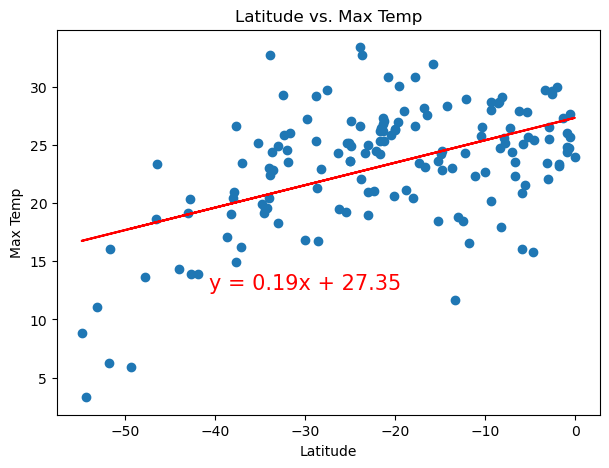

In [303]:
# Linear regression on Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Max Temp"]

(s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = stats.linregress(x_south, y_south)

#Plot
plt.figure(figsize=(7,5))
plt.scatter(x_south, y_south)
plt.plot(x_south, s_slope * x_south + s_intercept, color="red")
plt.title("Latitude vs. Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(f"y = {s_slope:.2f}x + {s_intercept:.2f}", xy=(-30, 14), ha="center", va="top", color="red", fontsize=15)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\826170509.py:5: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr) = stats.linregress(x_north, y_north)


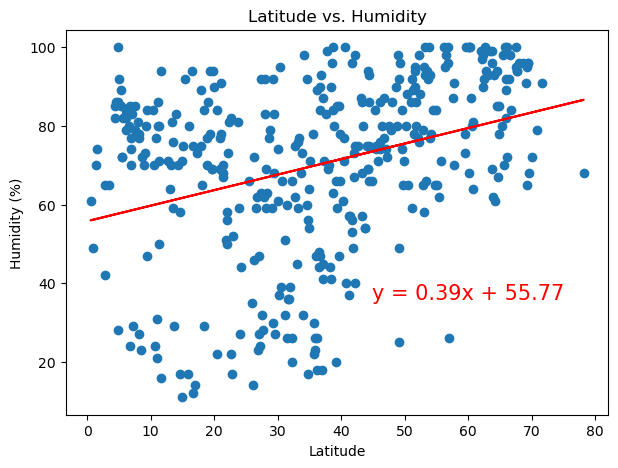

In [307]:
# Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Humidity"]

(n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr) = stats.linregress(x_north, y_north)
rvalue

#Plot
plt.figure(figsize=(7,5))
plt.scatter(x_north, y_north)
plt.plot(x_north, n_slope * x_north + n_intercept, color="red")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(f"y = {n_slope:.2f}x + {n_intercept:.2f}", xy=(60, 40), ha="center", va="top", color="red", fontsize=15)
plt.show()

C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\2201080017.py:5: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = stats.linregress(x_south, y_south)


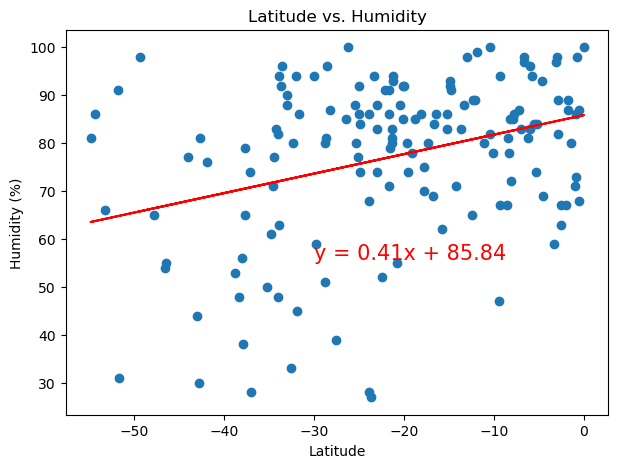

In [316]:
# Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Humidity"]

(s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = stats.linregress(x_south, y_south)

#Plot
plt.figure(figsize=(7,5))
plt.scatter(x_south, y_south)
plt.plot(x_south, s_slope * x_south + s_intercept, color="red")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(f"y = {s_slope:.2f}x + {s_intercept:.2f}", xy=(-30, 55), ha="left", va="bottom", color="red", fontsize=15)
plt.show()

##### **Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\2311302944.py:5: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr) = stats.linregress(x_north, y_north)


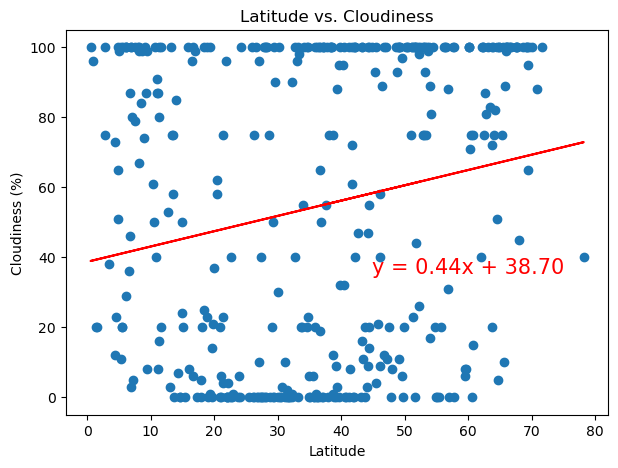

In [324]:
# Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Cloudiness"]

(n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr) = stats.linregress(x_north, y_north)
rvalue

#Plot
plt.figure(figsize=(7,5))
plt.scatter(x_north, y_north)
plt.plot(x_north, n_slope * x_north + n_intercept, color="red")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(f"y = {n_slope:.2f}x + {n_intercept:.2f}", xy=(60, 40), ha="center", va="top", color="red", fontsize=15)
plt.show()

C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\251212712.py:5: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = stats.linregress(x_south, y_south)


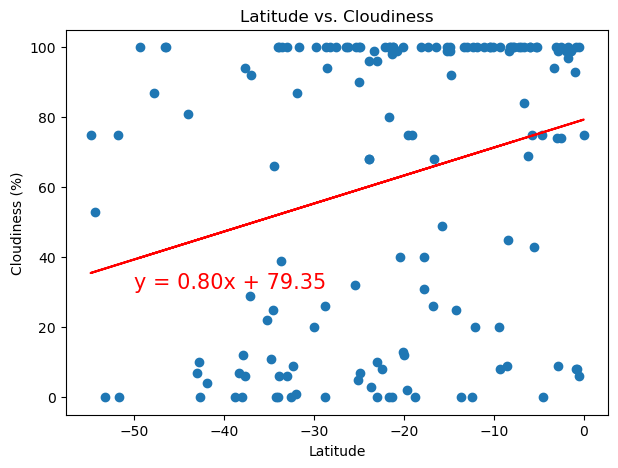

In [328]:
# Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Cloudiness"]

(s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = stats.linregress(x_south, y_south)

#Plot
plt.figure(figsize=(7,5))
plt.scatter(x_south, y_south)
plt.plot(x_south, s_slope * x_south + s_intercept, color="red")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(f"y = {s_slope:.2f}x + {s_intercept:.2f}", xy=(-50, 30), ha="left", va="bottom", color="red", fontsize=15)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\638987015.py:5: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr) = stats.linregress(x_north, y_north)


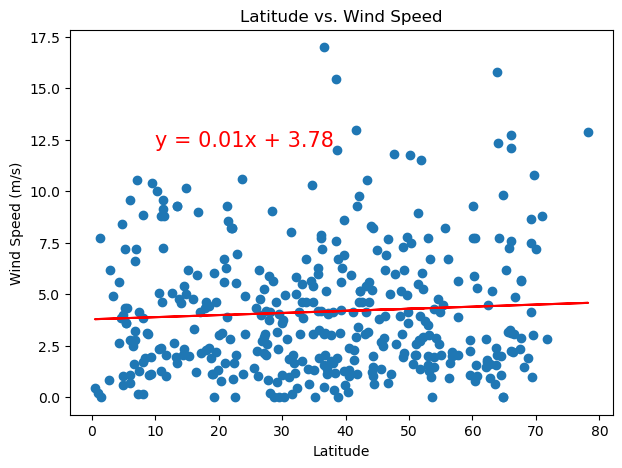

In [277]:
# Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Wind Speed"]

(n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr) = stats.linregress(x_north, y_north)
rvalue

#Plot
plt.figure(figsize=(7,5))
plt.scatter(x_north, y_north)
plt.plot(x_north, n_slope * x_north + n_intercept, color="red")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.annotate(f"y = {n_slope:.2f}x + {n_intercept:.2f}", xy=(10, 12), ha="left", va="bottom", color="red", fontsize=15)
plt.show()

C:\Users\roddi\AppData\Local\Temp\ipykernel_45656\2280749638.py:5: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  (s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = stats.linregress(x_south, y_south)


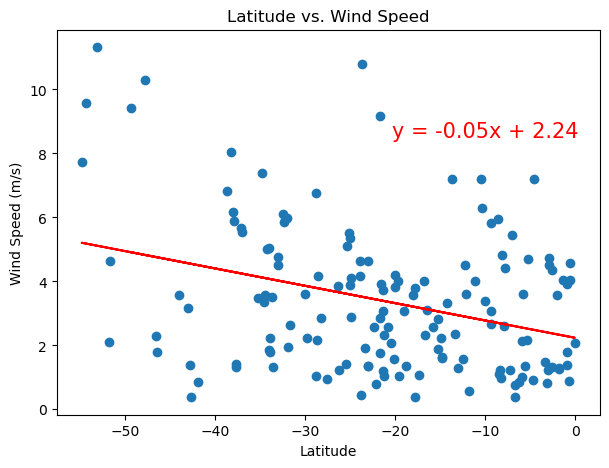

In [330]:
# Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Wind Speed"]

(s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = stats.linregress(x_south, y_south)

#Plot
plt.figure(figsize=(7,5))
plt.scatter(x_south, y_south)
plt.plot(x_south, s_slope * x_south + s_intercept, color="red")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.annotate(f"y = {s_slope:.2f}x + {s_intercept:.2f}", xy=(-10, 9), ha="center", va="top", color="red", fontsize=15)
plt.show()

**Discussion about the linear relationship:** 
Discuss the implications of your findings. What do the results mean? Are there any trends or patterns that stand out?
The closer to 0 latitude, the closer the data shows to achieving peak temperatures. This makes sense given this is where we find the equator. 
The drop in temperature is at a higher rate (slope) in the nothern hemisphere compared to the southern hemisphere. 
Humidity changes at a less rapid rate in the southern hemisphere compared to the northern hemisphere. 
Windspeed has less more in the nothern latitudes compared to the southern. Cloudiness is also more likely to be a higher percentage in the northern hemisphere. This may be related to the changes in humidity that may allow for more cloud formation.

Recommendations:
Provide recommendations based on your analysis. What should we do with this information?
Confirm is there is a positive correlation between changes in humidity and temperature changes. It is possible that the consistency in humidity mitigates variance. Also, confirm if there is a correlation between humidity and cloud formation. Lastly, because the northern hemisphere has more land, there needs to be more clarity on how the cloudiness was observed and if it was more observed over areas of land compared to out in the ocean. I also wonder if ths earth's tilt has anything to do with this as well.  

Conclusion:
The northernn hemisphere experiences greater variety in temperature, humidity, and cloudiness but the southern hemisphere has more variation in wind speed. There may be correlations between these factors. The equator experiences the highest temperatures compared to the rest of the planet. 
